In [82]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imp-train/train_data/Complex_Partial_Seizures/5955.npy
/kaggle/input/imp-train/train_data/Complex_Partial_Seizures/422.npy
/kaggle/input/imp-train/train_data/Complex_Partial_Seizures/970.npy
/kaggle/input/imp-train/train_data/Complex_Partial_Seizures/6179.npy
/kaggle/input/imp-train/train_data/Complex_Partial_Seizures/100.npy
/kaggle/input/imp-train/train_data/Complex_Partial_Seizures/1876.npy
/kaggle/input/imp-train/train_data/Complex_Partial_Seizures/1041.npy
/kaggle/input/imp-train/train_data/Complex_Partial_Seizures/4542.npy
/kaggle/input/imp-train/train_data/Complex_Partial_Seizures/6052.npy
/kaggle/input/imp-train/train_data/Complex_Partial_Seizures/4248.npy
/kaggle/input/imp-train/train_data/Complex_Partial_Seizures/3191.npy
/kaggle/input/imp-train/train_data/Complex_Partial_Seizures/63.npy
/kaggle/input/imp-train/train_data/Complex_Partial_Seizures/1364.npy
/kaggle/input/imp-train/train_data/Complex_Partial_Seizures/1740.npy
/kaggle/input/imp-train/train_data/Comp

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Path to the dataset folders
data_path = '/kaggle/input/imp-train/train_data'
folders = ['Normal', 'Complex_Partial_Seizures', 'Electrographic_Seizures', 'Video_detected_Seizures_with_no_visual_change_over_EEG']


In [84]:
def load_eeg_data(folder):
    # Create the full folder path
    folder_path = os.path.join(data_path, folder)
    print(f"Checking folder path: {folder_path}")
    
    # Check if the folder exists
    if not os.path.exists(folder_path):
        print(f"Folder {folder_path} does not exist.")
        return None
    
    # List all files in the folder
    files = os.listdir(folder_path)
    print(f"Files in {folder}: {files}")
    
    # Check if the folder is empty
    if not files:
        print(f"Folder {folder_path} is empty.")
        return None

    # Get the first file and check if it's a .npy file
    file_path = os.path.join(folder_path, files[0])
    if not file_path.endswith('.npy'):
        print(f"Skipping {file_path} as it is not a .npy file.")
        return None

    # Attempt to load the .npy file
    print(f"Loading data from: {file_path}")
    try:
        data = np.load(file_path)
        print(f"Loaded data shape: {data.shape}")
        return data
    except Exception as e:
        print(f"Error loading data from {file_path}: {e}")
        return None

# Iterate through the folders and load one file from each
for folder in folders:
    print(f"Processing folder: {folder}")
    data = load_eeg_data(folder)
    if data is not None:
        print(data)  # Print the data (or process it further)
    else:
        print(f"No data loaded from folder: {folder}")

Processing folder: Normal
Checking folder path: /kaggle/input/imp-train/train_data/Normal
Files in Normal: ['4548.npy', '5788.npy', '3709.npy', '6104.npy', '4684.npy', '2765.npy', '5197.npy', '5590.npy', '5669.npy', '331.npy', '4299.npy', '2434.npy', '4769.npy', '6082.npy', '4960.npy', '2424.npy', '4621.npy', '4706.npy', '6862.npy', '1200.npy', '3155.npy', '3844.npy', '719.npy', '4791.npy', '6773.npy', '5575.npy', '6254.npy', '4792.npy', '1191.npy', '461.npy', '4155.npy', '5980.npy', '3006.npy', '2083.npy', '1778.npy', '1702.npy', '5175.npy', '2528.npy', '4093.npy', '3996.npy', '2803.npy', '4136.npy', '6222.npy', '3992.npy', '2980.npy', '6365.npy', '5952.npy', '1965.npy', '6002.npy', '4705.npy', '464.npy', '2942.npy', '1479.npy', '4780.npy', '6699.npy', '4184.npy', '122.npy', '2785.npy', '3914.npy', '4495.npy', '1175.npy', '6549.npy', '407.npy', '2114.npy', '3799.npy', '5614.npy', '4186.npy', '5167.npy', '3302.npy', '6001.npy', '2704.npy', '2160.npy', '3854.npy', '2013.npy', '2960.npy'

In [85]:
# Calculate statistical metrics
def calculate_metrics(data):
    """
    Calculate basic statistical metrics for each channel in the EEG data.
    
    Parameters:
        data (numpy.ndarray): EEG data with shape (time_steps, channels).
    
    Returns:
        pandas.DataFrame: DataFrame containing metrics for each channel.
    """
    mean = np.mean(data, axis=0)
    zero_crossings = np.sum(np.diff(np.sign(data), axis=0) != 0, axis=0)
    value_range = np.ptp(data, axis=0)
    energy = np.sum(data**2, axis=0)
    rms = np.sqrt(np.mean(data**2, axis=0))
    variance = np.var(data, axis=0)
    
    # Combine metrics into a DataFrame for better readability
    metrics_df = pd.DataFrame({
        'Mean': mean,
        'Zero Crossing Rate': zero_crossings,
        'Range': value_range,
        'Energy': energy,
        'RMS': rms,
        'Variance': variance
    }, index=[f'Channel {i+1}' for i in range(data.shape[1])])
    return metrics_df


In [86]:
import numpy as np
import pandas as pd

def calculate_metrics(data):
    """
    Calculate basic statistical metrics for each channel in the EEG data.
    
    Parameters:
        data (numpy.ndarray): EEG data with shape (channels, time_steps).
    
    Returns:
        pandas.DataFrame: DataFrame containing metrics for each channel.
    """
    # Calculate metrics for each channel across time steps (axis=1)
    mean = np.mean(data, axis=1)
    zero_crossings = np.sum(np.diff(np.sign(data), axis=1) != 0, axis=1)
    value_range = np.ptp(data, axis=1)
    energy = np.sum(data**2, axis=1)
    rms = np.sqrt(np.mean(data**2, axis=1))
    variance = np.var(data, axis=1)
    
    # Combine metrics into a DataFrame for better readability
    metrics_df = pd.DataFrame({
        'Mean': mean,
        'Zero Crossing Rate': zero_crossings,
        'Range': value_range,
        'Energy': energy,
        'RMS': rms,
        'Variance': variance
    }, index=[f'Channel {i+1}' for i in range(data.shape[0])])
    
    return metrics_df

# Example usage
data = np.random.randn(19, 500)  # Simulated EEG data with 19 channels and 500 time steps
metrics_df = calculate_metrics(data)
print(metrics_df)


                Mean  Zero Crossing Rate     Range      Energy       RMS  \
Channel 1  -0.002208                 229  6.763962  493.815650  0.993796   
Channel 2   0.050413                 257  6.137751  509.139411  1.009098   
Channel 3  -0.034478                 258  5.328214  443.507656  0.941815   
Channel 4  -0.025847                 243  6.573880  536.882306  1.036226   
Channel 5   0.036921                 268  5.401323  517.562070  1.017411   
Channel 6   0.004791                 259  6.607259  525.142971  1.024835   
Channel 7   0.071011                 258  6.685858  487.216477  0.987134   
Channel 8   0.002501                 250  5.588497  514.520658  1.014417   
Channel 9  -0.060570                 252  6.577448  535.505352  1.034896   
Channel 10  0.019628                 251  6.176110  527.658167  1.027286   
Channel 11 -0.041793                 247  5.983829  512.241526  1.012168   
Channel 12  0.043941                 243  6.742390  532.036475  1.031539   
Channel 13 -

,Mean,Zero Crossing Rate,Range,Energy,RMS,Variance
Channel 1,-0.016,247,6.655,540.597,1.040,1.081
Channel 2,-0.018,254,6.167,507.860,1.008,1.015
Channel 3,-0.038,246,5.602,499.001,0.999,0.997
Channel 4,-0.058,244,5.771,500.701,1.001,0.998
Channel 5,0.062,242,6.439,495.994,0.996,0.988
Channel 6,0.034,259,5.633,500.826,1.001,1.000
Channel 7,-0.037,243,6.299,492.176,0.992,0.983
Channel 8,0.008,263,5.308,509.366,1.009,1.019
Channel 9,0.064,253,5.816,504.250,1.004,1.004
Channel 10,0.011,269,5.243,464.706,0.964,0.929


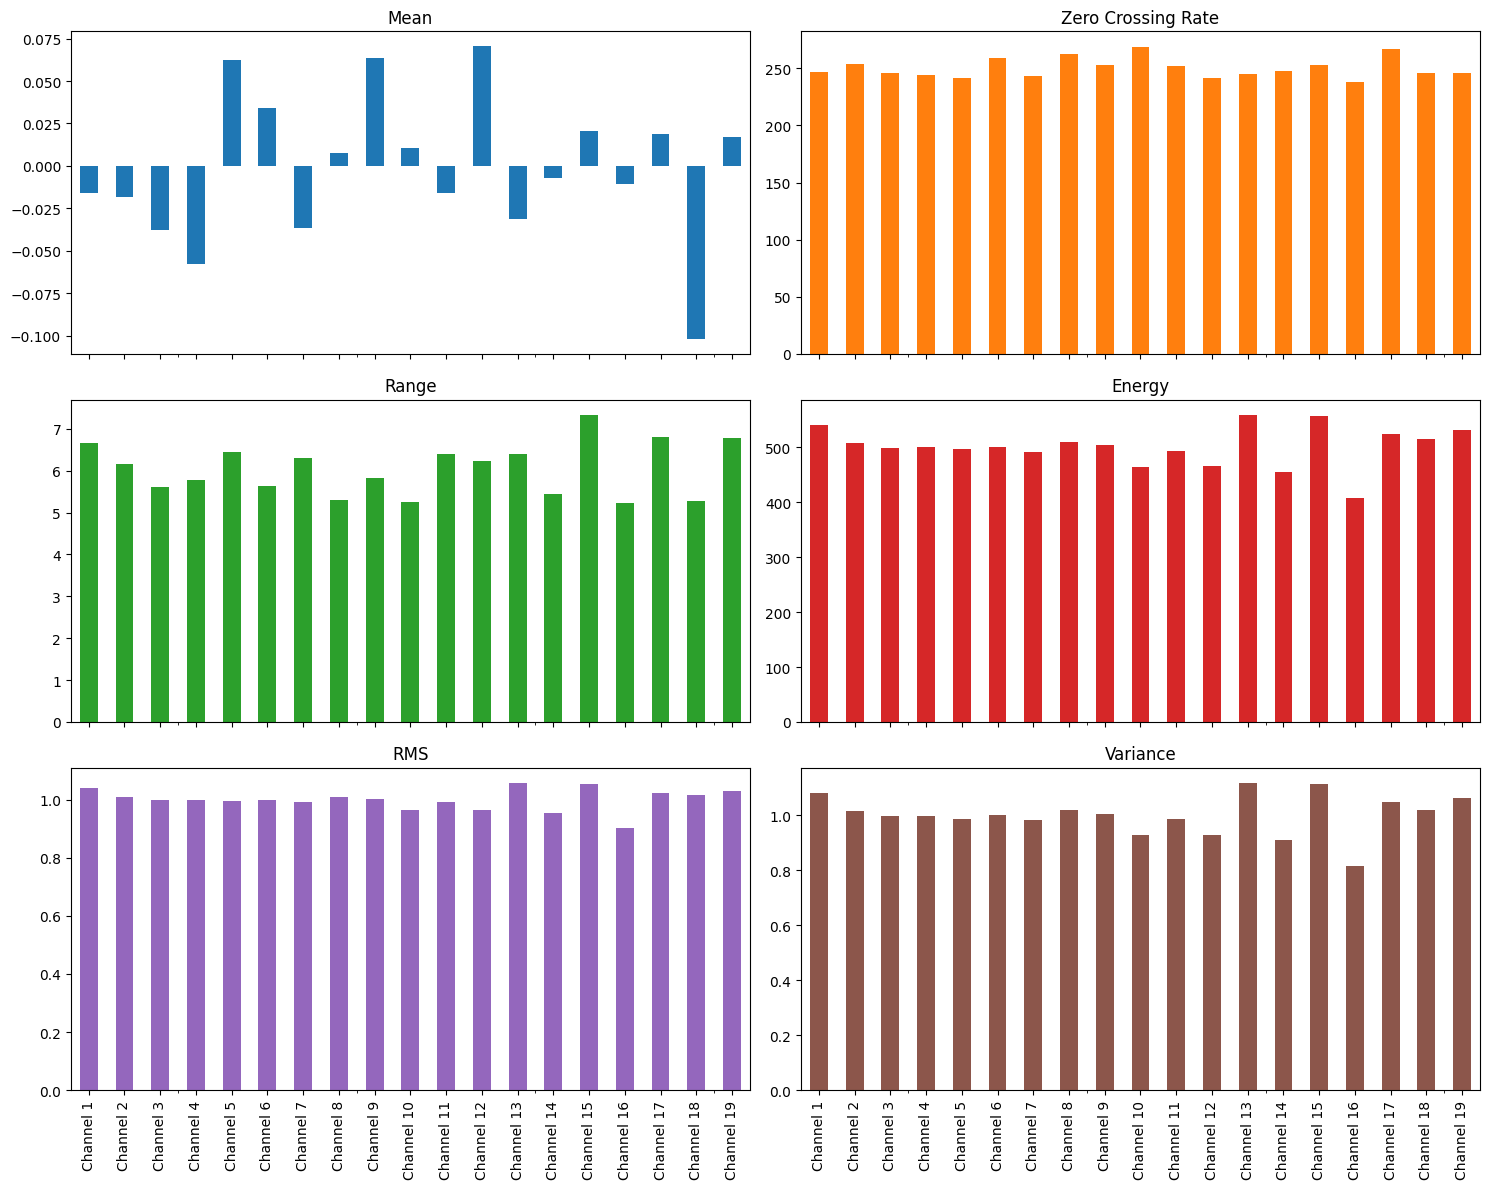

In [91]:
# Generate simulated EEG data
data = np.random.randn(19, 500)

# Calculate metrics
metrics_df = calculate_metrics(data)

# Display as a styled table with the updated format method
styled_table = metrics_df.style.background_gradient(cmap='coolwarm').format(precision=3)
display(styled_table)

# Plot metrics as bar charts for each metric
metrics_df.plot(kind='bar', subplots=True, layout=(3, 2), figsize=(15, 12), legend=False, sharex=True)
plt.tight_layout()
plt.show()

In [87]:
# Iterate through the folders and load one file from each
for folder in folders:
    print(f"Processing folder: {folder}")
    data = load_eeg_data(folder)
    if data is not None:
        print("Calculating metrics...")
        metrics_df = calculate_metrics(data)  # Calculate metrics and store result
        print("Metrics DataFrame:")
        print(metrics_df)  # Print the metrics DataFrame
    else:
        print(f"No data loaded from folder: {folder}")


Processing folder: Normal
Checking folder path: /kaggle/input/imp-train/train_data/Normal
Files in Normal: ['4548.npy', '5788.npy', '3709.npy', '6104.npy', '4684.npy', '2765.npy', '5197.npy', '5590.npy', '5669.npy', '331.npy', '4299.npy', '2434.npy', '4769.npy', '6082.npy', '4960.npy', '2424.npy', '4621.npy', '4706.npy', '6862.npy', '1200.npy', '3155.npy', '3844.npy', '719.npy', '4791.npy', '6773.npy', '5575.npy', '6254.npy', '4792.npy', '1191.npy', '461.npy', '4155.npy', '5980.npy', '3006.npy', '2083.npy', '1778.npy', '1702.npy', '5175.npy', '2528.npy', '4093.npy', '3996.npy', '2803.npy', '4136.npy', '6222.npy', '3992.npy', '2980.npy', '6365.npy', '5952.npy', '1965.npy', '6002.npy', '4705.npy', '464.npy', '2942.npy', '1479.npy', '4780.npy', '6699.npy', '4184.npy', '122.npy', '2785.npy', '3914.npy', '4495.npy', '1175.npy', '6549.npy', '407.npy', '2114.npy', '3799.npy', '5614.npy', '4186.npy', '5167.npy', '3302.npy', '6001.npy', '2704.npy', '2160.npy', '3854.npy', '2013.npy', '2960.npy'

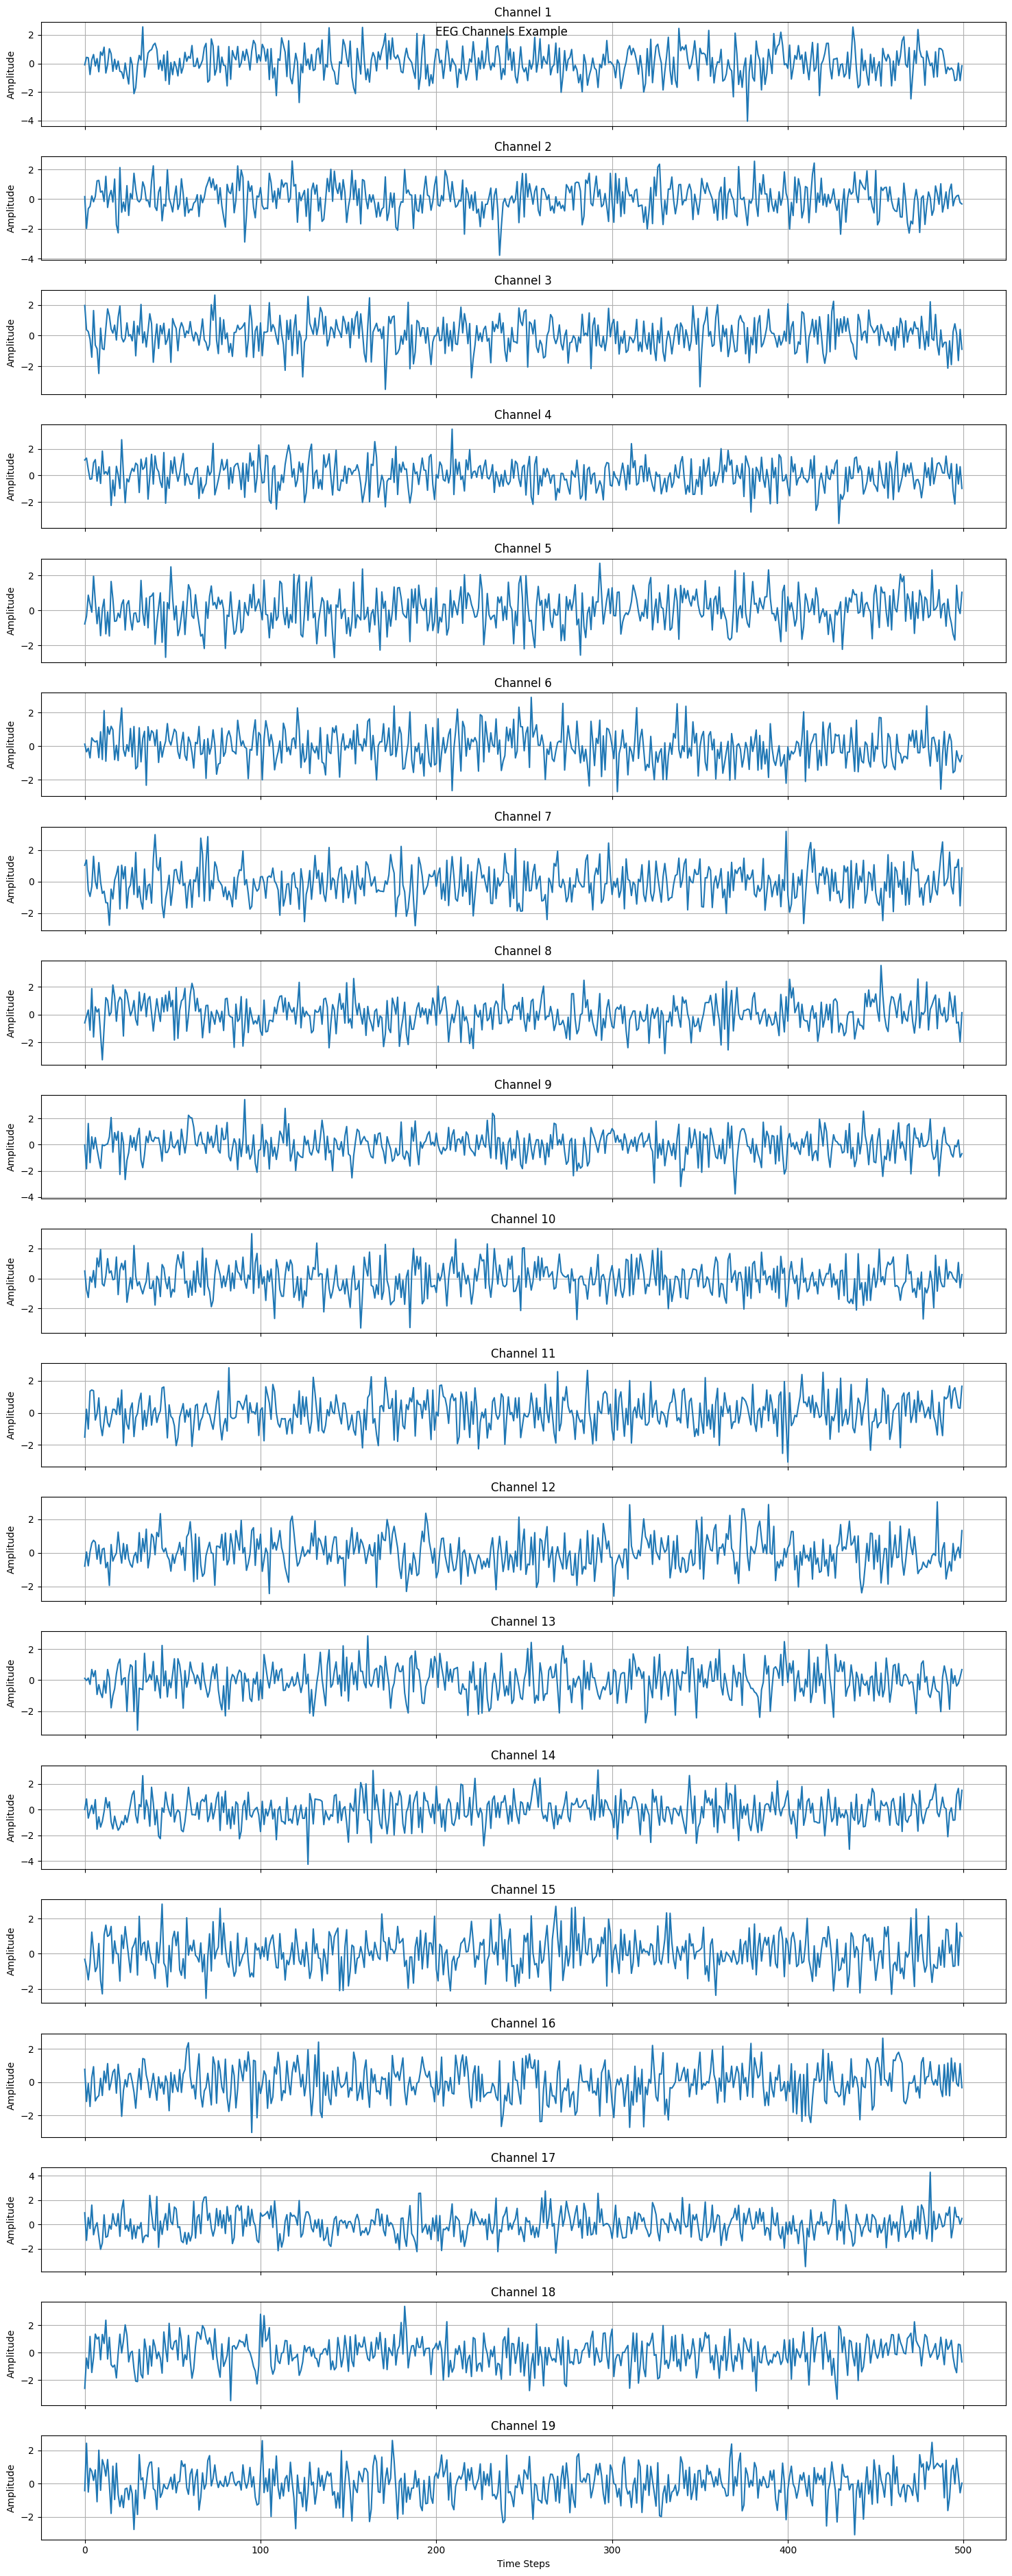

In [88]:
def plot_eeg_channels(data, title):
    """
    Plot individual EEG channels.
    
    Parameters:
        data (numpy.ndarray): EEG data with shape (time_steps, channels).
        title (str): Plot title.
    """
    num_channels = data.shape[1]
    fig, axes = plt.subplots(num_channels, 1, figsize=(15, 2 * num_channels), sharex=True)
    
    for i in range(num_channels):
        axes[i].plot(data[:, i])
        axes[i].set_title(f'Channel {i+1}')
        axes[i].set_ylabel('Amplitude')
        axes[i].grid(True)
    
    plt.xlabel('Time Steps')
    plt.suptitle(title)
    plt.tight_layout()
    return fig  # Return figure object for Kaggle to render

# Use the function as follows
data = np.random.randn(500, 19)  # Simulated data with 19 channels
fig = plot_eeg_channels(data, "EEG Channels Example")


Data shape: (19, 500)


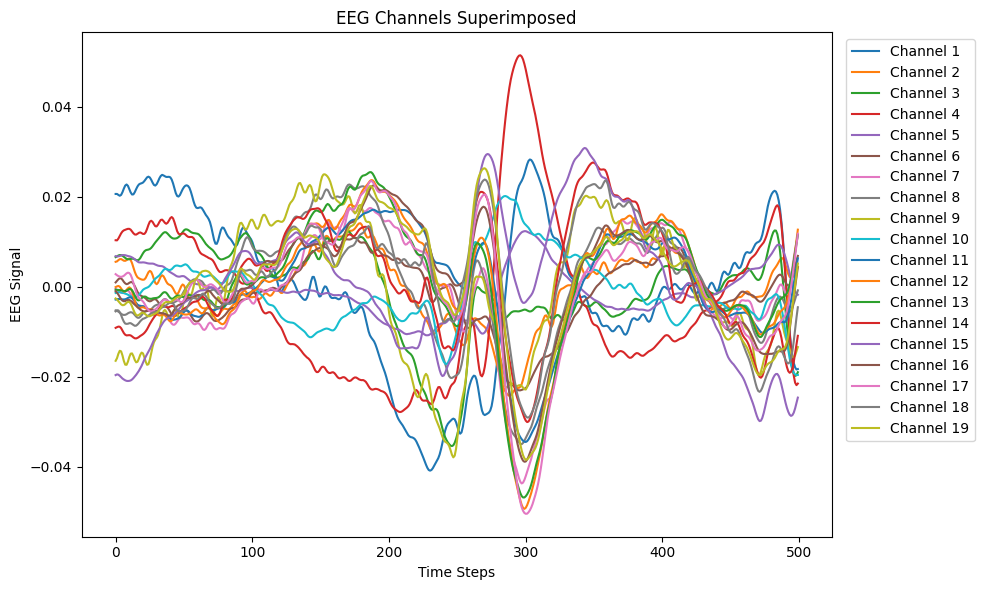

In [89]:
import numpy as np
import matplotlib.pyplot as plt

def plot_all_channels_superimposed(data, title="All Channels Superimposed"):
    """
    Plot all EEG channels superimposed on a single plot.
    
    Parameters:
    - data: 2D numpy array with shape (19, N), where N is the number of time points.
    - title: Title of the plot (default is "All Channels Superimposed").
    """
    plt.figure(figsize=(10, 6))
    
    # Plot each channel in the same plot
    for i in range(data.shape[0]):
        plt.plot(data[i, :], label=f'Channel {i+1}')
    
    plt.xlabel('Time Steps')
    plt.ylabel('EEG Signal')
    plt.title(title)
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
    plt.tight_layout()
    plt.show()

# Load your data (example with '4548.npy')
data_path = '/kaggle/input/imp-train/train_data/Normal/4548.npy'
data = np.load(data_path)

# Check data shape and plot if data is loaded
if data is not None and data.shape == (19, 500):  # 19 channels, 500 time points
    print("Data shape:", data.shape)
    plot_all_channels_superimposed(data, "EEG Channels Superimposed")
else:
    print("Data is empty or not loaded properly!")
